# CIFAR_10 using CNN


In [12]:
#importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import models,layers,datasets
import PIL
import tensorflow as tf


In [13]:
#Loading the dataset
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

In [14]:
'''There are totally 60000 datasets in which we divide 50000 for training & 10000 fore testing samples
each class contains 6000 images,each images has 3 rgb color channels and 32 X32 pixel dimensions'''
print("Train_Samples:",train_images.shape,train_labels.shape)
print("Test_Samples:",test_images.shape,test_labels.shape)

Train_Samples: (50000, 32, 32, 3) (50000, 1)
Test_Samples: (10000, 32, 32, 3) (10000, 1)


In [15]:
train_images = train_images / 255.0

test_images = test_images / 255.0

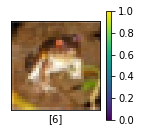

In [16]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

"""The matplotlib function imshow() creates an image from a 2-dimensional numpy array."""

plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.imshow(train_images[0])
plt.xlabel(train_labels[0])
plt.colorbar()
plt.show()

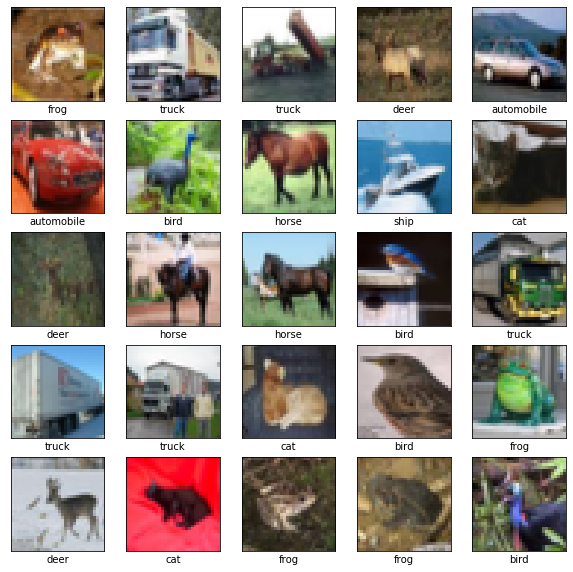

In [17]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)#(rows,column,pannel number)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()
    

In [18]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [21]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 697s 14ms/sample - loss: 1.5465 - accuracy: 0.4379 - val_loss: 1.2767 - val_accuracy: 0.5462
Epoch 2/10
50000/50000 [==============================] - 119s 2ms/sample - loss: 1.1924 - accuracy: 0.5741 - val_loss: 1.1276 - val_accuracy: 0.5982
Epoch 3/10
50000/50000 [==============================] - 145s 3ms/sample - loss: 1.0388 - accuracy: 0.6340 - val_loss: 1.0502 - val_accuracy: 0.6286
Epoch 4/10
50000/50000 [==============================] - 145s 3ms/sample - loss: 0.9476 - accuracy: 0.6679 - val_loss: 0.9600 - val_accuracy: 0.6663
Epoch 5/10
50000/50000 [==============================] - 187s 4ms/sample - loss: 0.8717 - accuracy: 0.6955 - val_loss: 0.9246 - val_accuracy: 0.6817
Epoch 6/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 0.8184 - accuracy: 0.7138 - val_loss: 0.8942 - val_accuracy: 0.6945
Epoch 7/10
50000/50000 [=========================

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)



10000/10000 - 7s - loss: 0.9063 - accuracy: 0.6958

Test accuracy: 0.6958


10000/10000 - 26s - loss: 0.9063 - accuracy: 0.6958


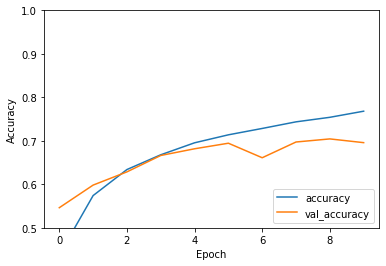

In [34]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [35]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [36]:
predictions = probability_model.predict(test_images)
predictions

array([[2.9057008e-03, 4.4039561e-04, 2.8688689e-03, ..., 2.1971419e-02,
        5.8348649e-03, 2.2316666e-03],
       [8.1903959e-04, 5.1028008e-04, 1.2013599e-06, ..., 2.7816773e-09,
        9.9857318e-01, 9.6119242e-05],
       [2.2463216e-02, 9.1227181e-03, 6.0678582e-04, ..., 1.5052009e-04,
        8.6944962e-01, 9.6258387e-02],
       ...,
       [1.6094136e-05, 4.7372556e-05, 3.3404462e-02, ..., 2.6023546e-01,
        8.6619367e-04, 9.4524665e-05],
       [9.3604550e-03, 1.1837154e-01, 1.9669111e-03, ..., 1.0165917e-02,
        1.0041971e-04, 4.0277918e-03],
       [1.8044683e-07, 6.3285555e-08, 4.9340902e-05, ..., 9.9363118e-01,
        1.2469606e-08, 1.4118875e-07]], dtype=float32)

In [27]:
predictions[0]

array([2.9057008e-03, 4.4039561e-04, 2.8688689e-03, 4.7719070e-01,
       5.5864681e-03, 4.7632366e-01, 4.6463623e-03, 2.1971419e-02,
       5.8348649e-03, 2.2316666e-03], dtype=float32)

In [28]:
np.argmax(predictions[0])

3

In [29]:
test_labels[0]

array([3], dtype=uint8)

In [88]:
def plot_image( predictions_array, true_label, img):
  i
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.xlabel("{}".format(class_names[predicted_label]),
                                color=color, fontsize=20)


def plot_value_array( predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  thisplot[predicted_label].set_color('blue')


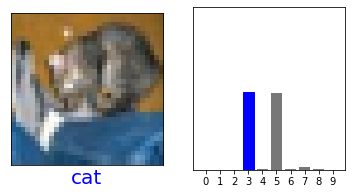

In [89]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image( predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array( predictions[i],  test_labels)
plt.show()

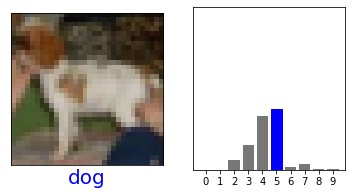

In [90]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array( predictions[i],  test_labels)
plt.show()

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


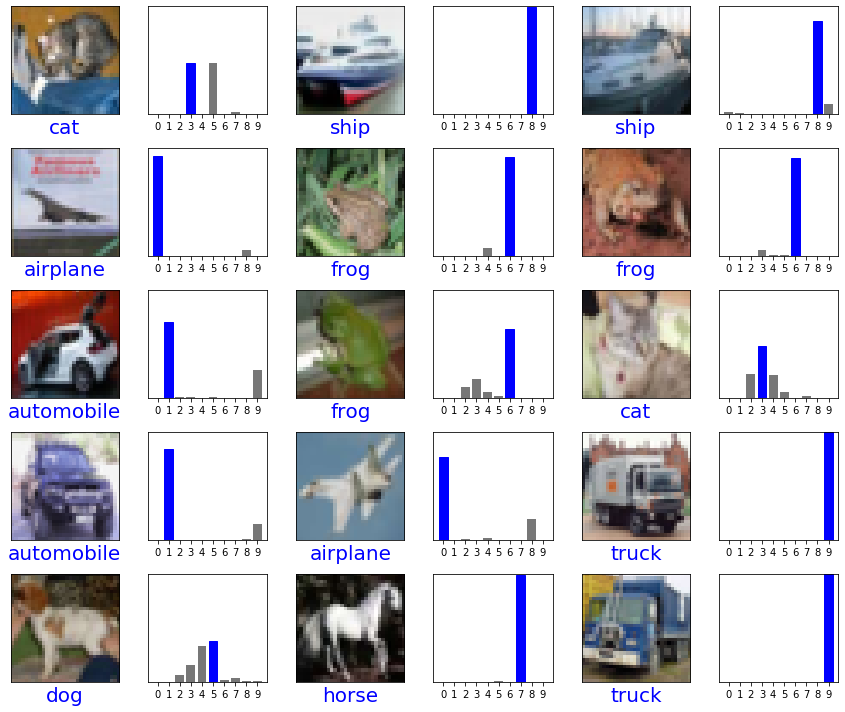

In [91]:
print(class_names)
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array( predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [99]:
from keras.models import load_model 
model.save('CIFAR_model.h5')